In [77]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [78]:
# read and process data 
data = pd.read_csv("database.csv")
data.drop(['date','name','email','institution','limit', 'stderr', 'consent'], axis=1, inplace=True)
data = data[data['input'].notna() & (data['input'] != '')]
data = data[data['command'] == 'enumerate_ensemble']

polypeptide_lengths = [len(item.split()[7]) for item in data['input']]
runtimes = [item for item in data['runtime']]
memory_usages = [item for item in data['memory_use']]

In [79]:
# scatter plots (no lines of best fit)

plt.scatter(polypeptide_lengths, runtimes, color = 'blue', marker = 'o')
plt.xlabel('Polypeptide Length', fontsize=18)
plt.xlim(0, 100)
plt.ylabel('Runtime (seconds)', fontsize=18)
plt.title('Polypeptide Length vs. Runtime', fontsize=18)
plt.show()

plt.scatter(polypeptide_lengths, memory_usages, color = 'blue', marker = 'o')
plt.xlabel('Polypeptide Length', fontsize=18)
plt.xlim(0,100)
plt.ylabel('Memory Usage (MB)', fontsize=18)
plt.title('Polypeptide Length vs. Memory Usage', fontsize=18)
plt.show()

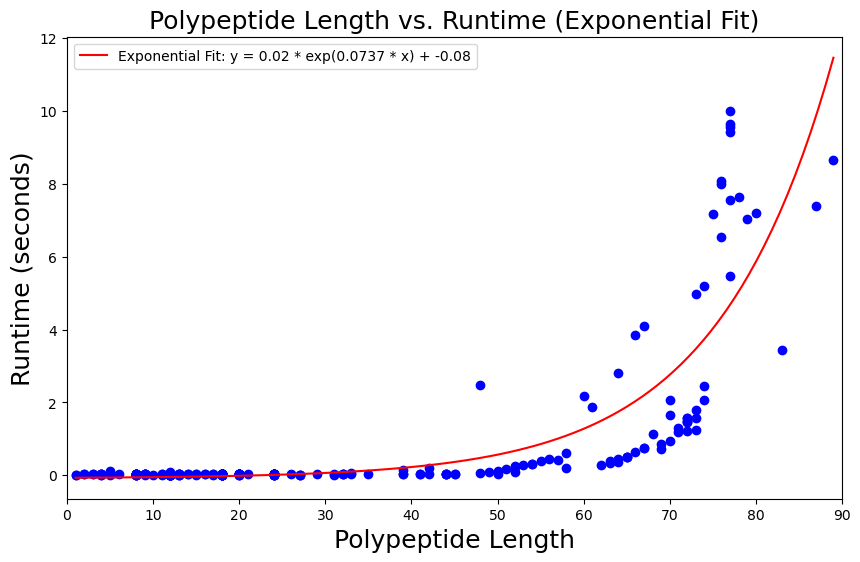

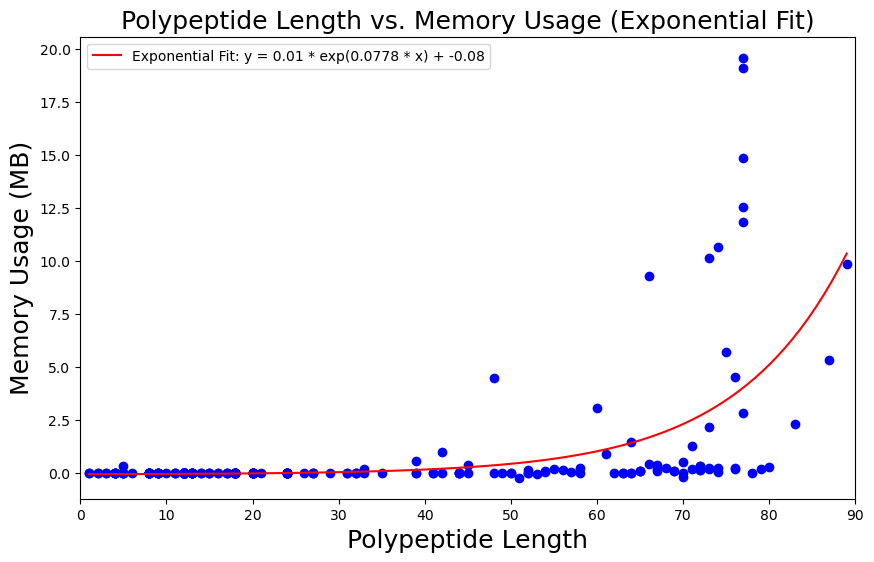

In [80]:
# scatter plots with lines of best fit overlayed

# define exponential function
def exponential(x, a, b, c):
    return a * np.exp(b * x) + c

# function to plot scatter with exponential fit
def plot_scatter_with_expfit(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', marker='o')
    
    # calculate exponential fit
    popt, _ = curve_fit(exponential, x, y, p0=[1, 0.1, 1])
    x_line = np.linspace(min(x), max(x), 100)
    y_line = exponential(x_line, *popt)
    
    # plot exponential fit
    plt.plot(x_line, y_line, color='red', 
             label=f'Exponential Fit: y = {popt[0]:.2f} * exp({popt[1]:.4f} * x) + {popt[2]:.2f}')
    
    plt.xlabel(xlabel, fontsize=18)
    plt.xlim(0, 90)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(title, fontsize=18)
    plt.legend()
    plt.show()

# plot Polypeptide Length vs. Runtime
plot_scatter_with_expfit(polypeptide_lengths, runtimes, 
                         'Polypeptide Length', 'Runtime (seconds)', 
                         'Polypeptide Length vs. Runtime (Exponential Fit)')

# plot Polypeptide Length vs. Memory Usage
plot_scatter_with_expfit(polypeptide_lengths, memory_usages, 
                         'Polypeptide Length', 'Memory Usage (MB)', 
                         'Polypeptide Length vs. Memory Usage (Exponential Fit)')
